

<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Uvod v numerične metode in sistemi linearnih enačb (1)</b></font>
<br><br>
<font size="4">
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Julij 2017</font>
</center>

# Table of Contents
 <p><div class="lev1"><a href="#Uvod"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev2"><a href="#Enoličnost-rešitve"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Enoličnost rešitve</a></div><div class="lev2"><a href="#Slaba-pogojenost-matrik"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Slaba pogojenost matrik</a></div><div class="lev3"><a href="#Poglejmo,-kaj-se-dogaja-v-naših-preprostih-primerih:"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Poglejmo, kaj se dogaja v naših preprostih primerih:</a></div><div class="lev2"><a href="#Pristopi-k-numeričnemu-reševanju"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pristopi k numeričnemu reševanju</a></div><div class="lev3"><a href="#Pregled-direktnih-metod"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Pregled direktnih metod</a></div><div class="lev1"><a href="#Gaussova-eliminacija"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gaussova eliminacija</a></div><div class="lev2"><a href="#Numerična-zahtevnost"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerična zahtevnost</a></div><div class="lev2"><a href="#Povzetek-Gaussove-eliminacije"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Povzetek Gaussove eliminacije</a></div><div class="lev1"><a href="#Nekaj-vprašanj-za-razmislek!"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1"><a href="#Dodatno"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dodatno</a></div>

# Uvod v numerične metode

Kadar želimo simulirati izbrani fizikalni proces tipično postopamo takole:
1. postavimo matematični model,
* izberemo numerično metodo in njene parametre,
* pripravimo program (pomagamo si z vgrajenimi funkcijami),
* izvedemo izračun, rezultate analizo in vrednotimo.

Reševanja matematičnega modela se v začetku učimo reševati **simbolno**; tako se v okviru matematike učimo reševanja sistema enačb, integriranja, odvajanja in podobno. Bistvo **numeričnih metod** je, da matematične modele rešujemo **numerično**, torej na podlagi **diskretnih vrednosti**. Kakor bomo spoznali pozneje, nam numerični pristop v primerjavi s simbolnim, omogoča reševanje bistveno obsežnejših in kompleksnejših problemov.

V nadaljevanju si bomo pogledali nekatere omejitve in izzive numeričnega pristopa. Prva omejitev je, da so v računalniku realne vrednosti vedno zapisane s končno natančnostjo, tipično se v Pythonu definiran števila v dvojni natančnosti s približno 15 signifikantnimi števkami. 

Število z dvojno natančnostjo se v Pythonu imeuje **float64** in je zapisano v spomin v binarni obliki v 64 bitih (11 bitov eksponent in 53 bitov mantisa (1 bit za predznak)). Ker je mantisa definirana na podlagi 52 binarnih števk, se lahko pojavi pri njegovem zapisu *relativna napaka* največ $\epsilon\approx2.2\cdot 10^{-16}$. Ta napaka se imenuje **osnovna zaokrožitvena napaka** in se lahko pojavi pri vsakem vmesnem
izračunu! 

Če je korakov veliko, lahko napaka zelo naraste in zato je pomembno, da je njen vpliv na izbrano numerično metodo čim manjši!

Spodaj je primer podrobnejših informacij za tip podatkov z dvojno natančnostjo (`float`):

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Poleg števila z dvojno natančnostjo, se uporabljajo drugi tipi podatkov; dober pregled različnih tipov je prikazan [tukaj](https://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html).

In [2]:
import numpy as np
število = np.int8(1)
f'Število {število} je tipa {type(število)} zapisano v binari obliki:{število:8b}'

"Število 1 je tipa <class 'numpy.int8'> zapisano v binari obliki:       1"

Pomembna lastnost numeričnih algoritmov je **stabilnost**, to pomeni, da majhna sprememba vhodnih podatkov povzroči majhno spremembo rezultatov. Če se, ob majhni spremembi na vhodu, rezultati zelo spremenijo, pravimo, da je **algoritem nestabilen**. V praksi torej uporabljamo stabilne algoritme; bomo pa pozneje spoznali, da je stabilnost lahko pogojena tudi z vhodnimi podatki!

Poznamo pa tudi **matematično nestabilnost**; ta nestabilnost je lastnost matematičnega modela/naloge/enačbe. V tem primeru govorimo o **slabi pogojenosti**.

Poleg nenatančnosti rezultatov, pa se pogosto srečamo tudi z **napako metode**:
* **nenatančnotjo vhodnih podatkov** (pogosto so npr. rezultat bolj ali manj natančnih meritev), 
* **zaokrožitveno napako** med izračunom,
* **napako algoritma** (pogosto ne more natančno popisati matematični model).

Med izvajanje numeričnega izračuna se napake lahko seštevajo, in sicer:
* **absolutna napaka** pri seštevanju/odštevanju,
* **relativna napaka** pri množenju/deljenju.

Posledično je rezultat operacije manj natančnen (ima manj zanesljivh števk) kakor pa je zanesljivost obeh operandov.

Tipičen primer, kjer je napaka lahko relativno velika, predstavlja odštevanje dveh približno enakih številk (npr. pri numeričnemu odvajanju).

Pri numeričnih metodah napako ponavadi napako lahko ocenimo ter nato izboljšamo rešitev.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing()

# Uvod v sistem enačb

Pod zgornjim naslovom razumemo sistem $m$ enačb ($E_i$) z $n$ neznankami ($x_i$):
$$
\begin{array}{rllllllll}
E_0: & a_{0,0}\,x_0 &+&a_{0,1}\,x_1&+& \ldots &+&a_{0,n-1}\,x_{n-1}&=&b_0\\
E_1: & a_{1,0}\,x_0 &+&a_{1,1}\,x_1&+& \ldots &+&a_{2,n-1}\,x_{n-1}&=&b_1\\
\vdots && &&& \vdots\\
E_{m-1}: & a_{m-1,0}\,x_0&+&a_{m-1,2}\,x_1&+& \ldots &+&a_{m-1,n}\,x_{n-1}&=&b_{m-1}.\\
\end{array}
$$
Koeficienti $a_{i,j}$ in $b_i$ so znana števila. 

V kolikor je desna stran enaka nič, torej $b_i=0$, imenujemo sistem **homogenem**, sicer **nehomogenem**.

Sistem enačb lahko zapišemo tudi v matrični obliki:

$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$

kjer sta $\mathbf{A}$ in $\mathbf{b}$ znana matrika in vektor, vektor $\mathbf{x}$ pa ni znan. Matriko $\mathbf{A}$ imenujemo **matrika koeficientov**, vektor $\mathbf{b}$ **vektor konstant** (tudi: vektor prostih členov ali vektor stolpec desnih strani) in $\mathbf{x}$ **vektor neznank**. Če matriki $\mathbf{A}$ dodamo kot stolpec vektor $\mathbf{b}$, dobimo t. i. **razširjeno matriko** in jo označimo $[\mathbf{A}|\mathbf{b}]$.

Opomba glede oblike:
* skalarne spremenljivke pišemo poševno, npr.: $a$,
* vektorske spremenljivke pišemo z majhno črko poudarjeno, npr.: $\mathbf{a}$,
* matrične  spremenljivke pišemo z veliko črko poudarjeno, npr.: $\mathbf{A}$.

## O rešitvi linearnega sistema enačb

Če nas sistemom linearnih enačb izvajamo **elementarne vrstične operacije**:
* množenje poljubne enačbe s konstanto (ki je različna od nič),
* spreminjanje vrstnega reda enačb,
* prištevanjem ene enačbe (pomnožene s konstanto) drugi enačbi.
rešitve sistema ne spremenimo in dobimo ekvivalentni sistem enačb.

S pomočjo elementarnih vrstičnih operacij preoblikujemo matriko $\mathbf{A}$ v t.i. **vrstično kanonično obliko**:
1. če obstajajo ničelne vrstice, so te na dnu matrike,
* vodilni neničelni element se nahaja desno od vodilnih neničelnih elementov predhodnih vrstic,
* vodilni neničelni element imenujemo **pivot** in je enak 1,
* pivot je edini neničeni element v vrstici.


**Rang matrike** predstavlja število neničelnih vrstic v vrstični kanonični obliki matrike; število neničelnih vrstic predstavlja število linearno neodvisnih enačb in je enako številu pivotnih elementov. 

Primer preoblikovanja matrike $\mathbf{A}$:

In [4]:
A = np.arange(9).reshape((3,3))+1
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Najprej opazimo, da neničeni element `A[0,0]` že ima vrednost 1 in ga vzmemo za pivotni element. Prvo vrstico `A[0,:]` pomnožimo z $-4$ in rezultat prištejemo drugi vrstici `A[1,:]-4A[0,:]`:

In [5]:
A[1,:] -= A[1,0]*A[0,:]
A

array([[ 1,  2,  3],
       [ 0, -3, -6],
       [ 7,  8,  9]])

Podobno naredimo za tretjo vrstico:

In [6]:
A[2,:] -= A[2,0]*A[0,:]
A

array([[  1,   2,   3],
       [  0,  -3,  -6],
       [  0,  -6, -12]])

V drugi vrstici sedaj potrebujemo pivot (`A[1,1]=1`):

In [7]:
A[1,:] = A[1,:]/A[1,1]
A

array([[  1,   2,   3],
       [  0,   1,   2],
       [  0,  -6, -12]])

In odštejemo sedaj drugo vrstico od ostalih, da dobimo v drugem stolpcu ničje povsod, razen v drugi vrstici vrednost 1:

In [8]:
A[0,:] -= A[0,1]*A[1,:]
A

array([[  1,   0,  -1],
       [  0,   1,   2],
       [  0,  -6, -12]])

In [9]:
A[2,:] -= A[2,1]*A[1,:]
A

array([[ 1,  0, -1],
       [ 0,  1,  2],
       [ 0,  0,  0]])

Opazimo, da imamo dve neničelni vrstici in dva pivota; matrika `A` torej predstavlja dve linearno neodivsni enačbi.

In [10]:
A

array([[ 1,  0, -1],
       [ 0,  1,  2],
       [ 0,  0,  0]])

Rang matrike pridobimo s pomočjo vgrajene funkcije [np.linalg.matrix_rank()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_rank.html).

In [11]:
np.linalg.matrix_rank(A)

2

Če sta rang matrike $\mathbf{A}$ in rang razširjene matrike $[\mathbf{A}|\mathbf{b}]$ enaka, potem rešitev **obstaja** (rečemo tudi, da je sistem **konsistenten**):
* $r=n$: natanko ena rešitev,
* $r<n$: neskončno mnogo rešitev.

Opomba: $r$ je rang matrike $\mathbf{A}$ oz. $[\mathbf{A}|\mathbf{b}]$, $n$ število neznank.

Tukaj se bomo omejili na sistem $n$ linearnih enačbami z $n$ neznankami:
$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$
takšen sistem ima rešitev
$$\mathbf{x}=\mathbf{A^{-1}}\,\mathbf{b},$$
če **matrike koeficientov** $\mathbf{A}$ ni singularna (matrika ni singularna, kadar njena determinanta ni nič: $|\mathbf{A}|\neq 0$, priporočam vizualno razlago determinante: [The determinant | Essence of linear algebra](https://www.youtube.com/watch?v=Ip3X9LOh2dk&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)).

Pozneje se bomo tudi dotaknili reševanja $m$ linearnih enačb z $n$ neznankami. Ker velja $m>n$, imamo predoločeni sistem:
$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$
Rešitev najdemo s **psevdo inverzne matrike** $\mathbf{A^{+}}$:
$$\mathbf{x}=\mathbf{A^{+}}\,\mathbf{b}.$$

Vrnimo se sedaj na sistem $n$ enačb z $n$ neznankami. Če je matrika koeficientov singularna, to je $|\mathbf{A}|=0$, potem ima sistem linearnih enačb neskončno mnogo rešitev ali pa rešitve sploh nima (odvisno od ranga).

Poglejmo si primer sistema, ko so **enačbe linearno odvisne**:

In [12]:
A = np.array([[1 , 2],
              [2, 4]])
b = np.array([1, 2])
Ab = np.column_stack((A,b))
Ab

array([[1, 2, 1],
       [2, 4, 2]])

In [13]:
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, število neznak: {len(b)}, det(A)={np.linalg.det(A)}'

'rang(A)=1, rang(Ab)=1, število neznak: 2, det(A)=0.0'

Poglejmo še primer, ko **rešitve sploh ni** (ene enačbe v nasprotju z drugo):

In [14]:
A = np.array([[1 , 2],
              [2, 4]])
b = np.array([1, 1])
Ab = np.column_stack((A,b))
Ab

array([[1, 2, 1],
       [2, 4, 1]])

In [15]:
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, število neznak: {len(b)}, det(A)={np.linalg.det(A)}'

'rang(A)=1, rang(Ab)=2, število neznak: 2, det(A)=0.0'

## Norma in pogojenost sistemov enačb

Numerična naloga je slabo pogojena, če povzroči majhna sprememba podatkov, veliko spremembo rezultata; v primeru majhne spremembe podatkov, ki povzročijo majhno spremembo rezultatov, pa je naloga dobro pogojena. Sistem enačb je ponavadi dobro pogojen, če so absolutne vrednosti diagonalnih elementov matrike koeflcientov velike
v primerjavi z absolutnimi vrednostmi izven diagonalnih elementov.

Obstaja pa tudi formalno merilo pogojenosti:
$$\textrm{cond}(||\textbf{A}||)=||\textbf{A}||\,||\textbf{A}^{-1}||.$$
Kjer je z $||\textbf{A}||$ označena **norma** matrike.

Obstaja več načinov merjenja norme, poglejmo si tukaj dve:
* Evklidska norma (tudi Frobeniusova):
$$||\textbf{A}||_e=\sqrt{\sum_{i=1}^n\sum_{j=1}^nA_{ij}^2}$$
* Norma vsote vrstic ali tudi neskončna norma:
$$||\textbf{A}||_{\infty}=\max_{1\le i\le n}\sum_{j=1}^n |A_{ij}|$$

Pogojenost računamo z vgrajeno funkcijo [np.linalg.cond()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.cond.html), katera sprejme dva parametra: matriko in želeni tip norme (poleg zgornjih dveh, se lahko izberejo še druge).

**Če je merilo pogojenosti blizu vrednosti 1, potem govorimo, da je matrika dobro pogojena** in obratno pri slabi pogojenosti se zelo poveča (v primeru singularne matrike proti neskončnosti, takrat računamo nekaj kar ne obstaja oz. ni enolično določeno).

Žal je izračun pogojenosti matrike numerično relativno zahteven.

### Primer slabo pogojene matrike

Uporabili bomo dve, rahlo različni, matriki koeficientov:

In [16]:
A = np.array([[1 , 1],#uporabite pri prvem poganjanju
              [1, 1.001]])
A = np.array([[1 , 1],#uporabite pri drugem poganjanju
              [1, 1.002]])
np.linalg.cond(A)

In vektor konstant:

In [17]:
b = np.array([3, 0])
Ab = np.column_stack((A,b))
Ab

array([[ 1.   ,  1.   ,  3.   ],
       [ 1.   ,  1.002,  0.   ]])

In [18]:
f'rang(A)={np.linalg.matrix_rank(A)}, rang(Ab)={np.linalg.matrix_rank(Ab)}, število neznak: {len(b)}, det(A)={np.linalg.det(A)}'

'rang(A)=2, rang(Ab)=2, število neznak: 2, det(A)=0.0020000000000000026'

In [19]:
Ab[1,:] -= Ab[1,0]*Ab[0,:]
Ab

array([[  1.00000000e+00,   1.00000000e+00,   3.00000000e+00],
       [  0.00000000e+00,   2.00000000e-03,  -3.00000000e+00]])

In [20]:
x1 = Ab[1,2]/Ab[1,1]
x1

In [21]:
x0 = (Ab[0,2] - Ab[0,1]*x1)/Ab[0,0]
x0

## Pristopi k numeričnemu reševanju

Dva v principu različna pristopa k reševanju sistemov linearnih enačb:

A) **Direktni pristop**: nad sistemom enačb izvajamo elementarne operacije, s katerimi predelamo sistem enačb v lažje rešljivega,

B) **Iterativni pristop**: izberemo začetni približek, nato pa približek iterativno izboljšuje.

# Gaussova eliminacija

Predpostavimo, da rešujemo sistem $n$ enačb za $n$ neznank, ki ima rang $n$, sistem je torej enolično rešljiv. Pri Gaussovi eliminaciji s pomočjo elementarnih vrstičnih operacij sistem enačb prevedemo v zgornje poravnani trikotni sistem (pod glavno diagonalo v razširjeni matriki so vrednosti nič).

Najprej pripravimo razširjeno matriko koeficientov:
$$\begin{bmatrix}
\mathbf{A}|\mathbf{b}
\end{bmatrix}=
\left[\begin{array}{cccc|c}
A_{0,0}&A_{0,1}&\cdots & A_{0,n-1} & b_0\\
A_{1,1}&A_{0,1}&\cdots & A_{1,n-1} & b_1\\
\vdots&\vdots&\ddots & \vdots & \vdots\\
A_{n-1,1}&A_{n-1,1}&\cdots & A_{n-1,n-1} & b_{n-1}\\
\end{array}\right]
$$

Gaussovo eliminacijo si bomo pogledali na zgledu:

In [22]:
A = np.array([[ 8., -6, 3],
              [-6, 6,-6],
              [ 3, -6, 6]])
b = np.array([-14, 36, 6])
Ab = np.column_stack((A,b))

In [23]:
Ab

array([[  8.,  -6.,   3., -14.],
       [ -6.,   6.,  -6.,  36.],
       [  3.,  -6.,   6.,   6.]])

Korak 0: prvo vrstico odštejemo od druge in tretje:

In [25]:
Ab[1,:] -= Ab[1,0]/Ab[0,0] * Ab[0,:]
Ab[2,:] -= Ab[2,0]/Ab[0,0] * Ab[0,:]
Ab

array([[  8.   ,  -6.   ,   3.   , -14.   ],
       [  0.   ,   1.5  ,  -3.75 ,  25.5  ],
       [  0.   ,  -3.75 ,   4.875,  11.25 ]])

Korak 1: drugo vrstico odštejemo od tretje:

In [26]:
Ab[2,:] -= Ab[2,1]/Ab[1,1] * Ab[1,:]
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

S tem je Gaussova eliminacija končana in lahko poiščemo rešitev, torej določimo vektor neznak $x$. 

Zadnja vrstica definira $x_2$:

In [27]:
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [28]:
x = np.zeros(3) #pripravimo prazen seznam
x[2] = Ab[2,-1]/Ab[2,2]
x

array([  0.        ,   0.        , -16.66666667])

S pomočjo predzadnje vrstice sedaj lahko določimo $x_1$:

In [29]:
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [30]:
x[1] = (Ab[1,-1] - Ab[1,2]*x[2]) / Ab[1,1]
x

array([  0.        , -24.66666667, -16.66666667])

S pomočjo prve vrstice sedaj lahko določimo $x_0$:

In [31]:
Ab

array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [32]:
x[0] = (Ab[0,3] - Ab[0,1:3]@x[1:]) / Ab[0,0]
x

array([-14.        , -24.66666667, -16.66666667])

Preverimo rešitev:

In [33]:
A @ x - b

array([  0.00000000e+00,   0.00000000e+00,   1.42108547e-14])

### Povzetek Gaussove eliminacije

V ``orodja.py`` shranimo funkcije:

In [35]:
def gaussova_eliminacija(A, b, prikazi_korake = False):
    Ab = np.column_stack((A, b))
    for p, pivot_vrsta in enumerate(Ab[:-1]):
        for vrsta in Ab[p+1:]:
            if pivot_vrsta[p]:
                vrsta[p:] -= pivot_vrsta[p:]*vrsta[p]/pivot_vrsta[p]
            else:
                raise Exception('Deljenje z 0.')
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print(Ab)
    return Ab
def gaussova_el_resitev(Ux):
    v = len(Ux)
    x = np.zeros(v)
    for p, pivot_vrsta in enumerate(Ux[::-1]):
        x[v-p-1] = (pivot_vrsta[-1] - pivot_vrsta[v-p:-1] @ x[v-p:] ) / (pivot_vrsta[v-p-1])
    return x

Opomba: algoritem, ko iz zgornje trikotnega sistema enačbe določamo rešitev, imenujemo **obratno vstavljanje** (angl. *back substitution*), saj rešujemo sistem $\mathbf{U}\,\mathbf{x}=\mathbf{b}$, kjer je $\mathbf{U}$ zgornja trikotna matrika.

V kolikor bi reševali sistem $\mathbf{L}\,\mathbf{x}=\mathbf{b}$ in je $\mathbf{L}$ spodnja trikotna matrika, bi to imenovali **direktno vstavljanje** (angl. *forward substitution*).


In [36]:
Ux = gaussova_eliminacija(A, b, prikazi_korake=True)
Ux

Korak: 0
[[  8.     -6.      3.    -14.   ]
 [  0.      1.5    -3.75   25.5  ]
 [  0.     -3.75    4.875  11.25 ]]
Korak: 1
[[  8.    -6.     3.   -14.  ]
 [  0.     1.5   -3.75  25.5 ]
 [  0.     0.    -4.5   75.  ]]


array([[  8.  ,  -6.  ,   3.  , -14.  ],
       [  0.  ,   1.5 ,  -3.75,  25.5 ],
       [  0.  ,   0.  ,  -4.5 ,  75.  ]])

In [37]:
gaussova_el_resitev(Ux)

array([-14.        , -24.66666667, -16.66666667])

## Numerična zahtevnost

Numerično zahtevnost ocenjujemo po številu matematičnih operacij, ki so potrebne za izračun. 
Za rešitev $n$ linearnih enačb tako z Gaussovo eliminacijo potrebujemo približno $n^3/3$ matematičnih operacij. Za določitev neznank $\mathbf{x}$ potrebujemo še dodatnih približno $n^2$ operacij.

Pri Gaussovi eliminaciji smo eliminacijo izvedli samo za člene pod diagonalo; če bi z eliminacijo nadaljevali in jo izvedli tudi za člene nad diagonalo, bi izvedli t. i. *Gauss-Jordanovo* eliminacijo, za katero pa potrebujemo dodatnih približno $n^3/3$ operacij* (kar se šteje kot glavna slabost te metode).

\* Nekaj komentarjev na temo števila numeričnih operacij najdete tukaj: [pinm.ladisk.si](http://pinm.ladisk.si/303/kako-dolo%C4%8Damo-numeri%C4%8Dno-zahtevnost-algoritmov).

## Uporaba knjižnjice `numpy`

Reševanje sistema linearnih enačb z [np.linalg.solve()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

In [38]:
np.linalg.solve(A, b)

array([-14.        , -24.66666667, -16.66666667])

# Nekaj vprašanj za razmislek!

1. Sistem enačb: 
    $$
    \mathbf{A}=
    \begin{bmatrix}
    1 & -4 & 1\\
    1 & 6 & -1\\
    2 & -1 & 2
    \end{bmatrix}
    \qquad
    \mathbf{b}=
    \begin{bmatrix}
    7\\
    13\\
    5
    \end{bmatrix}
    $$

    najdite rešitev s pomočjo ``np.linalg.solve()``.

* Za zgoraj definirano matriko $\mathbf{A}$ določite Evklidsko normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite neskončno normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite pogojenost (``numpy`` funkcija).
* Definirajte funkcijo ``gauss_elim``, ki za poljubno matriko $\mathbf{A}$ in vektor $\mathbf{b}$ izvede Gaussovo eliminacijo (posebej za matriko in posebej za vektor; tako, da ne sestavite razširjene matrike $[\mathbf{A}|\mathbf{b}]$).
* Definirajte funkcijo ``gauss_elim_x``, ki za razultat funkcije ``gauss_elim`` najde ustrezne vrednosti vektorja $\textbf{x}$.
* Zgornji funkciji dopolnite s štetjem matematičnih operacij.
* Na sliki je prikazan sistem mas:

    <img width=600 src="./fig/mase_na_klancu.png">
    
    Predpostavite, da se sistem zaradi teže giblje po klancu navzdol z neznanim pospeškom $a$ in da so vrvi napete z neznanimi silami $F_i$. Znane veličine so (sami jih določite): posamično telo ima maso $m_i$, koeficient trenja s podlago $\mu_i=1$, $g=9,81$m/s$^2$, $\varphi=55^{\circ}$.
    Določite sistem enačb v primeru dveh teles. Določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{b}$ ter $\mathbf{x}$.
* Za zgoraj definiran sistem mas predpostavite, da je mas 4 (ali več) ter določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{x}$ ter $\mathbf{b}$. Rešite sistem s pomočjo Gaussove elimnacije/LU razcepa ali ``np.linalg.solve``. Preverite pogojenost!
* V sistemu mas dobimo fizikalno nekonsistentno rešitev, če imamo v kateri od vrvi tlačno silo (vrv ne prenese tlačne sile). Preverite ali je to v vašem primeru res. Ustrezno spremenite koeficient(e) trenja, da se bo to zgodilo.

# Dodatno

Poglejte si strani:
* [micropython.org](http://www.micropython.org)
* [kivy.org](http://www.kivy.org)
* [openmodal.com](http://www.openmodal.com)

## Primer simbolnega reševanja sistema linearnih enačb v okviru `sympy`

In [194]:
A11, A12, A21, A22 = sym.symbols('A11, A12, A21, A22')
x1, x2 = sym.symbols('x1, x2')
b1, b2 = sym.symbols('b1, b2')
A = sym.Matrix([[A11, A12],
                [A21, A22]])
x = sym.Matrix([[x1],
                [x2]])
b = sym.Matrix([[b1],
                [b2]])

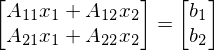

In [195]:
eq = sym.Eq(A*x,b)
eq

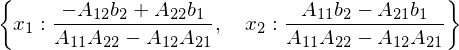

In [196]:
#%%timeit
resitev = sym.solve(eq,[x1, x2])
resitev

In [5]:
A.det()